In [1]:
import pandas as pd
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
trade_hist = pd.read_csv("../data/mid_cap_train.csv")
trade_hist['entry_date'] = pd.to_datetime(trade_hist['entry_date'])
trade_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       3720 non-null   int64         
 1   entry_date       3720 non-null   datetime64[ns]
 2   ticker           3720 non-null   object        
 3   entry_price      3720 non-null   float64       
 4   side             3720 non-null   object        
 5   pct_change_open  3720 non-null   float64       
 6   five_day_mean    3720 non-null   float64       
 7   five_day_var     3720 non-null   float64       
 8   twenty_day_mean  3720 non-null   float64       
 9   twenty_day_var   3720 non-null   float64       
 10  exit_price       3720 non-null   float64       
 11  win              3720 non-null   int64         
 12  pct_change       3720 non-null   float64       
 13  type             3720 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(

In [3]:
trade_hist['win'].mean()

0.49193548387096775

In [4]:
trade_hist['side'] = trade_hist['side'].apply(lambda x: 1 if x == 'long' else 0)
trade_hist['type'] = trade_hist['type'].apply(lambda x: 1 if x == 'trend' else 0)
trade_hist

,Unnamed: 0,entry_date,ticker,entry_price,side,pct_change_open,five_day_mean,five_day_var,twenty_day_mean,twenty_day_var,exit_price,win,pct_change,type
0,0,2019-02-07,NOV,32.560001,1,0.084610,0.016555,0.001528,0.007088,0.000652,28.400000,0,0.872236,1
1,1,2019-02-07,HQY,69.830002,1,0.074308,0.020394,0.001046,0.013884,0.000699,71.900002,1,1.029643,1
2,2,2019-02-07,HBI,16.670000,1,0.069961,0.022440,0.000742,0.009535,0.000488,18.629999,1,1.117576,1
3,3,2019-02-07,VSH,21.520000,1,0.008908,0.020886,0.000900,0.010387,0.000672,21.500000,0,0.999071,0
4,4,2019-02-07,NYCB,12.100000,1,0.011706,0.011542,0.000212,0.009179,0.000223,11.950000,0,0.987603,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3715,3715,2020-07-20,PK,9.080000,1,-0.062951,-0.013429,0.001747,-0.009802,0.001810,9.080000,0,1.000000,0
3716,3716,2020-07-20,MTDR,8.820000,0,-0.017817,0.023989,0.001759,-0.007168,0.003030,8.820000,0,0.000000,1
3717,3717,2020-07-20,CALX,15.970000,0,0.059019,0.015932,0.001176,0.006821,0.001052,15.970000,0,0.000000,0
3718,3718,2020-07-20,NARI,53.750000,0,0.055992,-0.000621,0.002774,0.005640,0.001142,53.750000,0,0.000000,0


In [5]:
trade_hist.columns

Index(['Unnamed: 0', 'entry_date', 'ticker', 'entry_price', 'side',
       'pct_change_open', 'five_day_mean', 'five_day_var', 'twenty_day_mean',
       'twenty_day_var', 'exit_price', 'win', 'pct_change', 'type'],
      dtype='object')

In [6]:
X = trade_hist[[
    'side',
    'type', 
    'pct_change_open', 
    'five_day_mean', 
    'five_day_var',
    'twenty_day_mean',
    'twenty_day_var' 
    ]]
y = trade_hist['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Recall:  0.7411444141689373
Accuracy:  0.5026881720430108


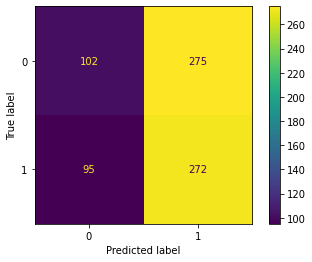

In [7]:
weights = {1:1.1, 0:1}
model = LogisticRegression(
    random_state=69, 
    class_weight=weights,
    solver='saga',
    penalty='l1'
).fit(X_train, y_train)
preds = model.predict(X_test)
print("Recall: ", recall_score(y_test, preds))
print("Accuracy: ", accuracy_score(y_test, preds))
plot_confusion_matrix(model, X_test, y_test)

Recall:  0.3569482288828338
Accuracy:  0.5201612903225806


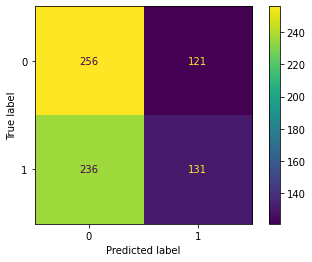

In [8]:
model = MLPClassifier(
    [4, 2], 
    random_state=69, 
    early_stopping=True,
    activation='tanh'
).fit(X_train, y_train)
preds = model.predict(X_test)
print("Recall: ", recall_score(y_test, preds))
print("Accuracy: ", accuracy_score(y_test, preds))
plot_confusion_matrix(model, X_test, y_test)

Recall:  0.7520435967302452
Accuracy:  0.5053763440860215


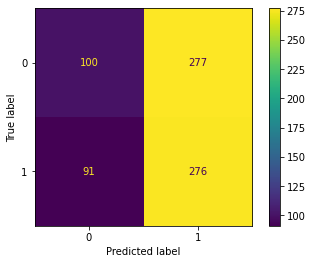

In [9]:
weights = {1:1.1, 0:1}
model = RandomForestClassifier(max_depth=3, random_state=69, class_weight=weights).fit(X_train, y_train)
preds = model.predict(X_test)
#print(preds)
print("Recall: ", recall_score(y_test, preds))
print("Accuracy: ", accuracy_score(y_test, preds))
plot_confusion_matrix(model, X_test, y_test)

Recall:  0.3079019073569482
Accuracy:  0.5201612903225806


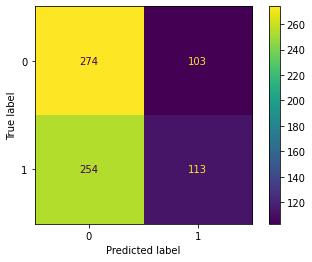

In [10]:
model = SVC(random_state=69).fit(X_train, y_train)
preds = model.predict(X_test)
print("Recall: ", recall_score(y_test, preds))
print("Accuracy: ", accuracy_score(y_test, preds))
plot_confusion_matrix(model, X_test, y_test)

Recall:  0.5803814713896458
Accuracy:  0.4838709677419355


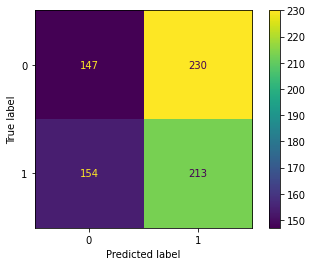

In [11]:
model = xgb.XGBClassifier(random_state=69, scale_pos_weight=1.5).fit(X_train, y_train)
preds = model.predict(X_test)
print("Recall: ", recall_score(y_test, preds))
print("Accuracy: ", accuracy_score(y_test, preds))
plot_confusion_matrix(model, X_test, y_test)